# Downsampling Hamiltonian Dynamics

Consider a Hamiltonian system $ \mathcal{H}(z) $. If I wish to find the trajectory of a new variable $ x = x(z) $, we can compute the average time evolution of $ x $ constraining to the hypersurface in $ z : x(z) = x $.

$$\begin{align}
\big\langle \dot{x} \big\rangle_{Z|X=x} &= \big\langle \{ x, \mathcal{H} \}_z \big\rangle_{Z|X=x} \\
  &= \int dz ~ \rho(z) \delta( x(z) - z ) ~ \{ x, \mathcal{H} \}_z
\end{align}$$

Above shows how to compute the average time evolution, but we should also care about higher moments. A sufficient condition for all higher moments to vanish (indicating a constant uncertainty) is that $ \{ x, \mathcal{H} \}_z = f(x) $ is purely a function of $ x $. Then,

$$\begin{align}
\big\langle \dot{x} \big\rangle_{Z|X=x} &= f(x) \int dz ~ \rho(z) \delta( x(z) - z ) \\
\dot{x} &= f(x)
\end{align}$$

The integral is unity by construction. It is trivial to see how all higher moments vanish.

## Springy Particles

$$\begin{align}
\mathcal{H}(\vec{q}, \vec{p}) &= \frac{1}{2} \big( p_1^2 + p_2^2 \big) + \frac{\lambda}{2} \big( q_1 - q_2 \big)^2
\end{align}$$

For $ \lambda \rightarrow 0 $, should behave like 2 free particles. For $ \lambda \rightarrow \infty $, like a single double mass particle. And for somewhere in the middle, there should be a point where it behaves more like a spring.

Let's define $ z = (q_1, q_2, p_1, p_2) $ and $ x(z) = (q_1 + \alpha q_2, p_1 + \alpha p_2) $,

$$\begin{align}
\{ x, \mathcal{H} \}_z &= \nabla x \cdot J \nabla H \\
  &= \left(\begin{matrix}
    1 & \alpha & 0 & 0 \\ 
    0 & 0 & 1 & \alpha \\
\end{matrix}\right) \left(\begin{matrix}
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    0 & -1 & 0 & 0 \\
    -1 & 0 & 0 & 0 \\
\end{matrix}\right) \left(\begin{matrix}
    \lambda(q_1 - q_2) \\
    \lambda(q_2 - q_1) \\
    p_1 \\
    p_2 \\
\end{matrix}\right) \\
  &= \left(\begin{matrix}
    p_1 + \alpha p_2 \\ 
    \lambda(q_2 - q_1) + \alpha \lambda(q_1 - q_2) \\
\end{matrix}\right) \\
  &= \left(\begin{matrix}
    p_1 + \alpha p_2 \\ 
    \lambda(1 - \alpha) (q_2 - q_1) \\
\end{matrix}\right) \\
\end{align}$$

For $ \alpha \in \{ -1, +1 \} $, we write $ \dot{x} = J x $. Either a free particle or a harmonic oscillator.

# 4 Up-Down Particles

$$\begin{align}
\mathcal{H}(\vec{s}) = \big( s_1 + s_2 \big)\big( s_3 + s_4 \big)
\end{align}$$

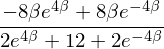

In [9]:
import sympy as sp
from itertools import product
from IPython.display import display
sp.init_printing()

beta = sp.symbols("beta")

def H(s1, s2, s3, s4):
    return (s1 + s2)*(s3 + s4)

Z = sum(sp.exp(-beta*H(*s)) for s in product(*[[-1, 1]]*4))
S = sum(beta*H(*s) * sp.exp(-beta*H(*s)) for s in product(*[[-1, 1]]*4))/Z

display(S)

Let's define a mapping $ x: \{-1, +1\}^4 \rightarrow \{-1, +1\}^n $ for $ n < 4 $. We can construct a new Hamiltonian, $ \mathcal{H}(x) $ such that,

$$\begin{align}
H(S | X) &= - \sum_{x \in \{-1, +1\}^n} \sum_{s \in \{-1, +1\}^4} Pr(S=s, X=x) \log \frac{Pr(S=s, X=x)}{Pr(X=x)} \\
  &= H(S) + \sum_{s \in \{-1, +1\}^4} Pr(S=s) \log Pr(X=x(s))
\end{align}$$



# Numerical

Let $ Z \sim \mathcal{N}(0, 1) $ and then $ x(z) = Az_1^2 + Bz_2^2 $.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(Z, bins):
    p, x = np.histogram(Z, bins=bins)
    p, dx = p[p > 0.0], np.diff(x)[p > 0.0]
    return np.sum((dx*p*np.log(p)))
    
def cond_entropy(A, B, N=100000):
    Z = np.random.randn(2, N)
    X = A*Z[0, :]**2 + B*Z[1, :]**2

    dx = (np.max(X) - np.min(X))/N**0.5
    bins = np.arange(np.min(X), np.max(X), dx)
    
    return np.mean([
        entropy(Z[0, (low <= X) & (X < high)], bins=int(N**0.75)) +
        entropy(Z[1, (low <= X) & (X < high)], bins=int(N**0.75))
        for low, high in zip(bins[:-1], bins[1:])
    ])

for A in np.arange(0, 1, 0.1):
    B = 1.0 - A
    H = cond_entropy(A, B, N=int(1e6))
    print(f"({A:0.2f}, {B:0.2f}) ==> {H}")

(0.00, 1.00) ==> 0.2989123206118202
(0.10, 0.90) ==> 0.07105848152617368
(0.20, 0.80) ==> 0.04818642883268534
(0.30, 0.70) ==> 0.031160840439799463
(0.40, 0.60) ==> 0.027339378147086497
(0.50, 0.50) ==> 0.024377230515990205
(0.60, 0.40) ==> 0.027268314968600285
(0.70, 0.30) ==> 0.036356545315719614
(0.80, 0.20) ==> 0.043253503631420186
(0.90, 0.10) ==> 0.07012047221967486


So the optima is $ A = B = 0.5 $ as one might predict.